

# Project: TMDb Movie Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this project, I will use the data from the Movie Databse(TMDb). It has information about 10,000 movies, which includes user ratings and revenue. Also, it provides different categories, such as runtime, director, production companies, release year etc.

Questions I plan to ask for this project:

1.What kinds of movies have higher popoularity?

a. Do movies with longer runtime have higher popularity?
b. Would vote_average impact popularity?
    
2.What make movies have higher revenue?

a. Do movies with higher budget have higher revenue?
b. Would release_date impact revenue?


In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> First, I will investigate my data and see what types of data I need to use to answer all the questions. Then, I will clean my dataset by droping unuseful data and duplicates so that we can have more accurate answers. 

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df=pd.read_csv('tmdb-movies.csv')
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [3]:
#Check how many null values in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

>Observations: I see that there are 21 columns for the dataset.There are 10856 entries for each columns/catergoes. However, we have a lot of null entries for homepage, tagline,keywords, and production_companies.

### Data Cleaning 

1. I need to remove some unused cols, which are not relevant to my questions 
2. Drop duplicate rows if there are any
3. Check null values and determine if I should drop those
4. Check the statistics of the dataframe
5. Clean zero values if there are any

In [4]:
#I decided to remove these cols from the dataframe since they are not relevant
df.drop(['id','imdb_id','homepage','tagline','overview','budget_adj','revenue_adj','cast','director','keywords','production_companies'], axis=1, inplace=True)
df.head(2)

,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015


In [5]:
#drop any duplicate row from the dataframe
df.drop_duplicates(inplace=True)

In [6]:
#Look at the sum of null value in each column
df.isnull().sum()

popularity         0
budget             0
revenue            0
original_title     0
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
dtype: int64

In [7]:
#drop the 23 null rows for genres since it is small amount 
df.dropna(inplace=True)

In [8]:
#Again, check how many null values in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10842 entries, 0 to 10865
Data columns (total 10 columns):
popularity        10842 non-null float64
budget            10842 non-null int64
revenue           10842 non-null int64
original_title    10842 non-null object
runtime           10842 non-null int64
genres            10842 non-null object
release_date      10842 non-null object
vote_count        10842 non-null int64
vote_average      10842 non-null float64
release_year      10842 non-null int64
dtypes: float64(2), int64(5), object(3)
memory usage: 931.7+ KB


In [9]:
#check the statistics for whole dataframe, we can see that there are zero values for budget, revenue, and runtime
#it is important to analyze them since budget, revenue and runtime should not be zero in real life situation
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,10842.000000,1.084200e+04,1.084200e+04,10842.000000,10842.000000,10842.000000,10842.000000
mean,0.647461,1.465531e+07,3.991138e+07,102.138443,217.823649,5.974064,2001.314794
std,1.001032,3.093971e+07,1.171179e+08,31.294612,576.180993,0.934257,12.813617
min,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000
25%,0.208210,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000
50%,0.384532,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000
75%,0.715393,1.500000e+07,2.414118e+07,111.000000,146.000000,6.600000,2011.000000
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000


In [10]:
#check rows that have zero budget
df_zero_bug = df.query('budget == 0')
df_zero_bug.head()

,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year
30,3.927333,0,29355203,Mr. Holmes,103,Mystery|Drama,6/19/15,425,6.4,2015
36,3.358321,0,22354572,Solace,101,Crime|Drama|Mystery,9/3/15,474,6.2,2015
72,2.272044,0,45895,Beyond the Reach,95,Thriller,4/17/15,81,5.5,2015
74,2.165433,0,0,Mythica: The Darkspore,108,Action|Adventure|Fantasy,6/24/15,27,5.1,2015
75,2.141506,0,0,Me and Earl and the Dying Girl,105,Comedy|Drama,6/12/15,569,7.7,2015


In [11]:
#change zero values to null,get more accurate result
df['budget']= df['budget'].replace(0, np.NaN)

In [12]:
#check rows that have zero revenue
df_zero_rev = df.query('revenue == 0')
df_zero_rev.head()

,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year
48,2.932340,30000000.0,0,Wild Card,92,Thriller|Crime|Drama,1/14/15,481,5.3,2015
67,2.331636,20000000.0,0,Survivor,96,Crime|Thriller|Action,5/21/15,280,5.4,2015
74,2.165433,NaN,0,Mythica: The Darkspore,108,Action|Adventure|Fantasy,6/24/15,27,5.1,2015
75,2.141506,NaN,0,Me and Earl and the Dying Girl,105,Comedy|Drama,6/12/15,569,7.7,2015
92,1.876037,NaN,0,Mythica: The Necromancer,0,Fantasy|Action|Adventure,12/19/15,11,5.4,2015


In [13]:
#change zero values to null,get more accurate result
df['revenue']= df['revenue'].replace(0, np.NaN)

In [14]:
#check rows that have zero runtime value
df_runtime = df.query('runtime == 0' )
df_runtime.head()

,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year
92,1.876037,NaN,NaN,Mythica: The Necromancer,0,Fantasy|Action|Adventure,12/19/15,11,5.4,2015
334,0.357654,NaN,NaN,Ronaldo,0,Documentary,11/9/15,80,6.5,2015
410,0.097514,NaN,NaN,Anarchy Parlor,0,Horror,1/1/15,15,5.6,2015
445,0.218528,NaN,NaN,The Exorcism of Molly Hartley,0,Horror,10/9/15,52,5.0,2015
486,0.176744,NaN,NaN,If There Be Thorns,0,TV Movie|Drama,4/5/15,11,5.4,2015


In [15]:
#only select rows which runtime is not equal to 0 since most budget and revenue are null when runtime is zero
df.query('runtime != 0', inplace=True)

In [16]:
#the dataset is now finalized and cleaned
df.head()

,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year
0,32.985763,150000000.0,1.513529e+09,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015
1,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015
2,13.112507,110000000.0,2.952382e+08,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015
3,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015
4,9.335014,190000000.0,1.506249e+09,Furious 7,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015


<a id='eda'></a>
## Exploratory Data Analysis


### Question 1 : What kinds of movies have higher popoularity?

Text(0,0.5,'Number of Movie')

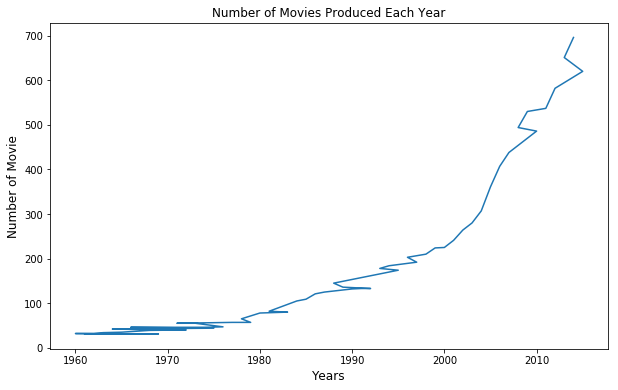

In [17]:
#since 1960, number of movies produced has increased every year. Movies became more and more popular. 

#get the total amount of movies that were released in each year
df_movies = df['release_year'].value_counts()

#plot the line graph of number of movies produced each year, set the figure size 
df_movies.plot(kind= 'line',title= 'Number of Movies Produced Each Year',figsize=(10,6))
plt.xlabel('Years', fontsize= 12)
plt.ylabel('Number of Movie', fontsize= 12)


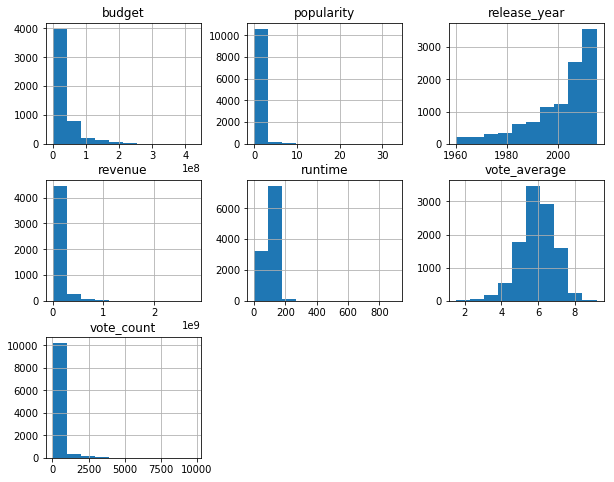

In [18]:
#plot histograms for the whole dataframe to analyze each variable
df.hist(figsize=(10,8));

a. Do movies with longer runtime have higher populaity?

Text(0.5,0,'runtime')

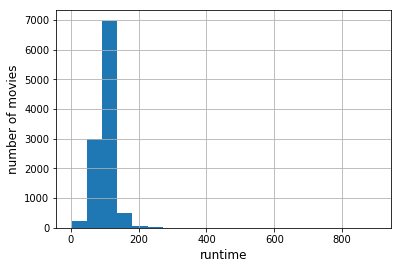

In [19]:
#check histogram for runtime, we can see that most movies have runtime between 100 to 150 
df['runtime'].hist(bins=20);
plt.ylabel('number of movies', fontsize= 12)
plt.xlabel('runtime', fontsize= 12)

Text(0.5,0,'runtime')

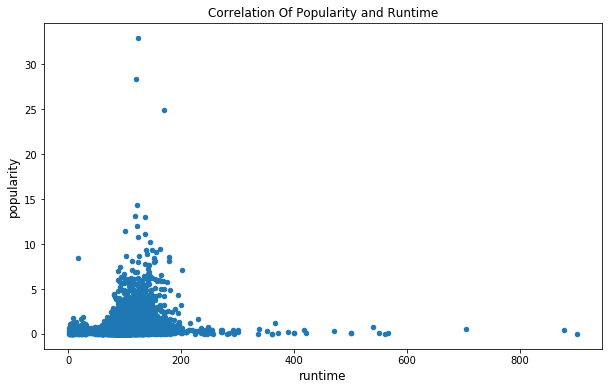

In [20]:
#We will look at the relationship between runtime and popoularity by plotting scatter graph
df.plot(x='runtime',y='popularity',kind='scatter',title = "Correlation Of Popularity and Runtime",figsize=(10,6));
plt.ylabel('popularity', fontsize= 12)
plt.xlabel('runtime', fontsize= 12)

We can see that there are movies with longer runtime have lower popularity. Movies with runtime between 100 to 150 are more popular than others. 

In [21]:
#Investigate what types of movies have runtime more than 200 
df_long_runtime = df.query('runtime > 200')
df_long_runtime['genres'].value_counts().head(3)


Documentary      12
Drama             7
Drama|History     3
Name: genres, dtype: int64

b. Would vote_average impact popularity?

Text(0.5,0,'vote_average')

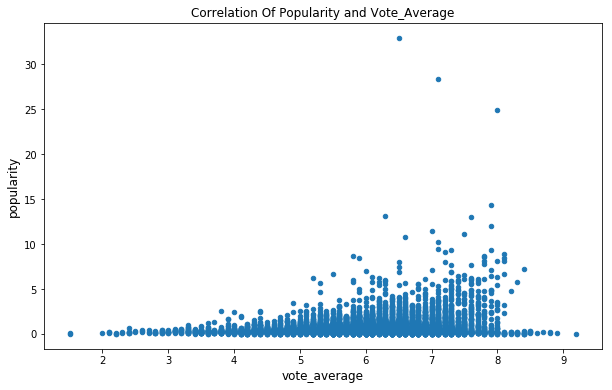

In [22]:
#We will look at the relationship between vote_average and popoularity by plotting scatter graph
df.plot(x='vote_average',y='popularity',kind='scatter',title = "Correlation Of Popularity and Vote_Average",figsize=(10,6));
plt.ylabel('popularity', fontsize= 12)
plt.xlabel('vote_average', fontsize= 12)


We can see that movies with higher popoularity have vote_average between 6 to 8. Even though some movies have vote_average 9, they are not very popular.

In [23]:
#investigate what types of movies have vote_average higher than 8 
df_high_score = df.query('vote_average > 8')
df_high_score['genres'].value_counts().head(3)

Documentary    13
Music           6
Comedy          4
Name: genres, dtype: int64

We analyzed movies have runtime more than 200 and vote_average higher than 8. Even though Documentary movies have higher vote_average and runtime, They are not very popular compare with other types of movies based on the datas. 

### Question 2 : What make movies have higher revenue?

a. Do movies with higher budget have higher revenue?

Text(0,0.5,'budget')

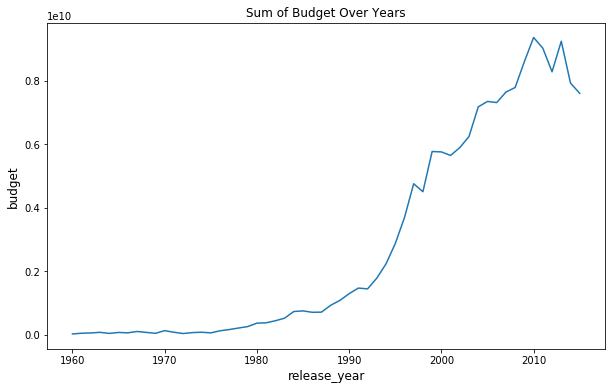

In [25]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.

#get the total amount of budget for movies that were released in each year
budget_year= df.groupby('release_year')['budget'].sum()

#plot the line graph of sum of budget each year, set the figure size 
budget_year.plot(title = "Sum of Budget Over Years",figsize=(10,6))
plt.xlabel('release_year', fontsize= 12)
plt.ylabel('budget', fontsize= 12)


Text(0,0.5,'revenue')

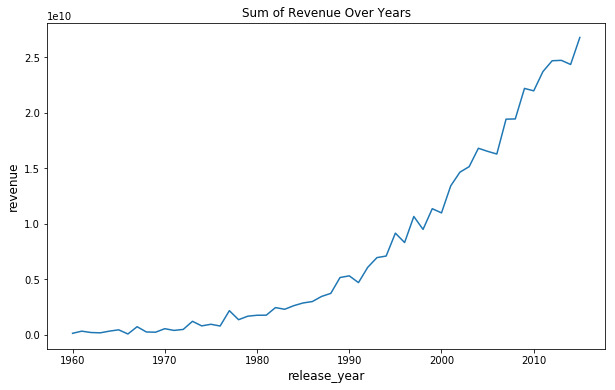

In [24]:
#get the total amount of revenue for movies that were released in each year
revenue_year= df.groupby('release_year')['revenue'].sum()

#plot the line graph of sum of revenue each year, set the figure size 
revenue_year.plot(title = "Sum of Revenue Over Years",figsize=(10,6))
plt.xlabel('release_year', fontsize= 12)
plt.ylabel('revenue', fontsize= 12)


We can see that the correlation between budget and revenue. Especially in 2010, the sum of revenue was actually increased when sum of budget was decreased. Producers know how to make high revenue movies with lower cost.

b. Would release_date impact revenue?

In [25]:
#First, I believe movies that are released in summer time would have higher revenue. I chose 2015 as a sample.
df_2015 = df.query('release_year > 2014')

#look at the statistics for movies that were released in 2015
df_2015.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,620.000000,2.100000e+02,2.160000e+02,620.000000,620.000000,620.000000,620.0
mean,1.040527,3.617404e+07,1.239002e+08,97.467742,293.851613,5.890161,2015.0
std,2.247651,4.932525e+07,2.685473e+08,24.169379,706.955630,1.091671,0.0
min,0.003920,1.000000e+01,4.444000e+03,4.000000,10.000000,2.400000,2015.0
25%,0.205946,6.000000e+06,2.761856e+06,88.000000,18.000000,5.200000,2015.0
50%,0.401092,1.500000e+07,3.353774e+07,95.000000,45.500000,5.900000,2015.0
75%,0.981750,4.000000e+07,1.043239e+08,108.000000,197.500000,6.700000,2015.0
max,32.985763,2.800000e+08,2.068178e+09,300.000000,6185.000000,8.900000,2015.0


In [26]:
#pick movies that were released in 2015
df_new = df.query('release_year > 2014')

#find the mean of revenue for movies that were released in 2015 summer time
summer_time = (df_new['release_date'] >= '6/1/15') & (df_new['release_date'] <= '9/30/15')
df_new.loc[summer_time].mean().revenue


114339662.04651164

We can see that summer movie revenue is around the 75% quartile. Indeed, release_date would impact revenue. More people would like to watch movies during summer time.

Text(0,0.5,'revenue')

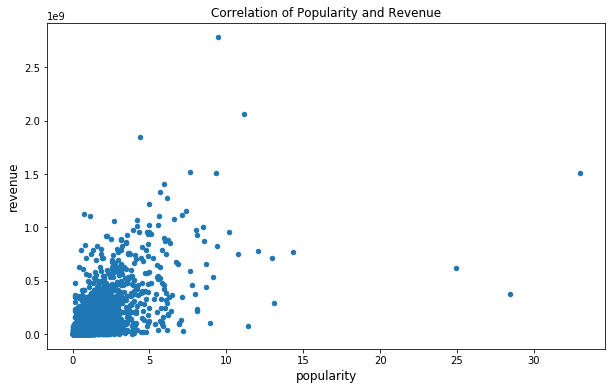

In [27]:
#Lastly, I am interested to see the correlation between popularity and revenue
df.plot(x='popularity',y='revenue',kind='scatter',title = "Correlation of Popularity and Revenue",figsize=(10,6));
plt.xlabel('popularity', fontsize= 12)
plt.ylabel('revenue', fontsize= 12)

#popularity is not depend on revenue
#In some case, higher popularity movies have lower revenue and lower popoularity movies have higher revenue

<a id='conclusions'></a>
## Conclusions

In this Investigate a Dataset project, I have learned a lot about movies:

1. In order to make movies have higher popularity, movie's runtime should be between 100 and 150.
2. Not the highest vote_average has highest popularity. Based on the data, movies with higher popoularity have vote_average between 6 to 8.
3. For documentary movies, even though they have higher vote_average and longer runtime, they are not as popular as other types of movies.
4. Higher budget movies may not create higher revenue. Nowadays, more movies with lower budget can also make higher revenue. 
5. If producers want to make more revenue, they should release movies in the summer time. 
6. There is no strong correlation between popularity and revenue.

Limitation:
1. There are different vote_count for different movies. It is not very accurate that we just use vote_average.
2. I only picked cols that relevant to my questions. However, I believe cast and director also very important to movies' popularity and revenue.
3. For a more accurate result, we should probably find out the outliers and missing values.
